# Imports 

In [1]:
import ipynb.fs.full.PrepareData as data
from sklearn.multioutput import MultiOutputRegressor
import itertools

strategyArray = []
errorArray    = [[], []]

/home/leandro/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
  0%|          | 0/43 [00:00<?, ?it/s]

[316, 311, 316, 302, 314, 318, 313, 320, 315, 311, 310, 307, 314]
2 chs: 316 entries
3 chs: 311 entries
4 chs: 316 entries
5 chs: 302 entries
6 chs: 314 entries
7 chs: 318 entries
8 chs: 313 entries
9 chs: 320 entries
10 chs: 315 entries
15 chs: 311 entries
20 chs: 310 entries
30 chs: 307 entries
40 chs: 314 entries
Dataset entries: 3926


 77%|███████▋  | 33/43 [00:11<00:03,  3.12it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 88%|████████▊ | 38/43 [00:11<00:00,  5.02it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 21%|██        | 9/43 [00:00<00:02, 14.01it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 74%|███████▍  | 32/43 [00:09<00:02,  3.78it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 91%|█████████ | 39/43 [00:10<00:00,  5.63it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 77%|███████▋  | 33/43 [00:10<00:05,  1.69it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 88%|████████▊ | 38/43 [00:11<00:01,  2.54it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 21%|██        | 9/43 [00:00<00:03,  9.00it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 77%|███████▋  | 33/43 [00:09<00:02,  3.86it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 91%|█████████ | 39/43 [00:11<00:01,  3.92it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 91%|█████████ | 39/43 [00:13<00:01,  2.42it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 21%|██        | 9/43 [00:00<00:02, 14.39it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 88%|████████▊ | 38/43 [00:10<00:01,  3.33it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 88%|████████▊ | 38/43 [00:11<00:01,  3.55it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 21%|██        | 9/43 [00:01<00:04,  8.35it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 77%|███████▋  | 33/43 [00:12<00:03,  3.23it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 91%|█████████ | 39/43 [00:14<00:01,  3.08it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 43/43 [00:14<00:00,  2.92it/s]


# Sorting the dataset

In [2]:
sortedDict = {}
commonRegressors = data.commonRegressors

for regressor in commonRegressors:
    sortedDict[regressor] = 0
    
    for i in range(data.ampNumber):
        sortedDict[regressor] += data.finalList[i][regressor][0] + data.finalList[i][regressor][1]


sortedDict = dict(sorted(sortedDict.items(), key = lambda x : x[1]))
sortedDict = dict(itertools.islice(sortedDict.items(), 5))

print(sortedDict.keys())

dict_keys(['GaussianProcessRegressor', 'LGBMRegressor', 'GradientBoostingRegressor', 'XGBRegressor', 'Ridge'])


# Processing data

In [3]:
from sklearn.metrics import mean_absolute_error

def getMAE(yTrue, yPredicted):
    gainErrors = []
    lossErrors = []
    
    rangeList = list(range(len(yTrue[0])))
    
    for true, predicted in zip(yTrue, yPredicted):
        gainTrue      = [true[x] for x in rangeList[0::2]]
        gainPredicted = [predicted[x] for x in rangeList[0::2]]
        lossTrue      = [true[x] for x in rangeList[1::2]]
        lossPredicted = [predicted[x] for x in rangeList[1::2]]
        
        gainErrors.append(mean_absolute_error(gainTrue, gainPredicted))
        lossErrors.append(mean_absolute_error(lossTrue, lossPredicted))
        
    return gainErrors, lossErrors

# Plotting function

In [4]:
import matplotlib.pyplot as plt

def plotGrid(gainData, lossData):
    fontSize = 32
    
    fig, axis = plt.subplots(2, figsize = (10, 10))
    
    axis[0].boxplot(gainData)
    axis[0].set_title("Test error for Gain", fontsize = fontSize)
    axis[0].get_xaxis().set_visible(False)
    axis[0].yaxis.set_tick_params(labelsize = fontSize)
    axis[0].set_yticklabels(range(0, 4))
    axis[0].set_ylim(0, 3)
    
    axis[1].boxplot(lossData)
    axis[1].set_title("Test error for Loss", fontsize = fontSize)
    axis[1].xaxis.set_tick_params(labelsize = fontSize)
    axis[1].yaxis.set_tick_params(labelsize = fontSize)
    axis[1].set_xticklabels(strategyArray)
    axis[1].set_yticklabels(range(0, 4))
    axis[1].set_ylim(0, 3)

    #fig.text(0.053, 0.5, 'Erro Médio Absoluto (dB)', va='center', rotation='vertical', fontsize = 30)

    plt.gcf().subplots_adjust(bottom = 0.08)
    fig.savefig("../../graphs/perLink-{}amp.pdf".format(data.ampNumber), format = 'pdf', dpi = 1000, bbox_inches = "tight")

# Building the models

In [5]:
cvData = []
X, y = data.loadDataset()

for i in range(5):
    X_train, X_test, y_train, y_test = data.train_test_split(X, y, test_size = 0.3, random_state = i)
    cvData.append([X_train, X_test, y_train, y_test])
    
count = 1

In [6]:
from sklearn.linear_model import BayesianRidge

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    model = MultiOutputRegressor(BayesianRidge())
    model.fit(cvData[i][0], cvData[i][2])

    result = model.predict(cvData[i][1])

    print(cvData[i][-1][0], result[0])

    mae = getMAE(cvData[i][3], result)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("BR")
count += 1

[17.  0. 18.  0. 21.  3. 24.  0.] [1.69900112e+01 1.17162602e-03 1.83613651e+01 3.68645634e-01
 1.93812637e+01 1.38035585e+00 2.19504345e+01 5.56025771e-01]
[17.  0. 19.  1. 19.  1. 24.  2.] [1.69845851e+01 8.96006401e-04 1.83490187e+01 3.65785864e-01
 1.93855323e+01 1.36306191e+00 2.19356326e+01 1.24122924e+00]
[17.  0. 18.  0. 18.  0. 20.  0.] [1.69862723e+01 6.31941157e-05 1.83642961e+01 3.98827507e-01
 1.92745678e+01 1.22329062e+00 2.19316390e+01 4.21258715e-02]
[17.  0. 18.  0. 20.  3. 20.  0.] [16.97909811  0.03461093 18.38603864  0.42629273 19.41038058  1.39274979
 21.98099483  0.24098912]
[17.  0. 18.  0. 19.  2. 20.  0.] [17.06088871  0.11573047 18.34531464  0.3484548  19.39774595  1.4124771
 21.96721056  0.12080042]


In [7]:
from sklearn.ensemble import RandomForestRegressor

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    model = MultiOutputRegressor(RandomForestRegressor())
    model.fit(cvData[i][0], cvData[i][2])

    result = model.predict(cvData[i][1])

    print(cvData[i][-1][0], result[0])

    mae = getMAE(cvData[i][3], result)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("RF")
count += 1

[17.  0. 18.  0. 21.  3. 24.  0.] [16.99073032  0.         18.3191307   0.33393493 19.38104899  1.36955014
 21.94367764  0.54803119]
[17.  0. 19.  1. 19.  1. 24.  2.] [16.98313319  0.         18.31696773  0.33888616 19.31079606  1.30071718
 22.01316682  1.25785578]
[17.  0. 18.  0. 18.  0. 20.  0.] [16.98551157  0.         18.34486507  0.39580025 19.22015024  1.19237752
 21.78288485  0.04083326]
[17.  0. 18.  0. 20.  3. 20.  0.] [16.97674541  0.03749911 18.44910451  0.46476513 19.40495551  1.39388279
 21.99832683  0.24324216]
[17.  0. 18.  0. 19.  2. 20.  0.] [17.06603711  0.11882615 18.34942024  0.35891074 19.50143561  1.52258808
 22.04394855  0.11511376]


In [8]:
from sklearn.tree import DecisionTreeRegressor

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    model = MultiOutputRegressor(DecisionTreeRegressor())
    model.fit(cvData[i][0], cvData[i][2])

    result = model.predict(cvData[i][1])

    print(cvData[i][-1][0], result[0])

    mae = getMAE(cvData[i][3], result)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("DT")
count += 1

[17.  0. 18.  0. 21.  3. 24.  0.] [16.99078341  0.         18.32258065  0.33640553 19.37788018  1.38248848
 21.94930876  0.55760369]
[17.  0. 19.  1. 19.  1. 24.  2.] [16.98190045  0.         18.31674208  0.33484163 19.30316742  1.29864253
 22.          1.25339367]
[17.  0. 18.  0. 18.  0. 20.  0.] [16.98617512  0.         18.34562212  0.39170507 19.22119816  1.19354839
 21.75576037  0.04147465]
[17.  0. 18.  0. 20.  3. 20.  0.] [16.97757848  0.03587444 18.44843049  0.46188341 19.40807175  1.39013453
 22.          0.23766816]
[17.  0. 18.  0. 19.  2. 20.  0.] [17.0678733   0.11764706 18.35294118  0.35294118 19.50678733  1.5158371
 22.05429864  0.11312217]


In [9]:
from sklearn.linear_model import LassoCV

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    model = MultiOutputRegressor(LassoCV())
    model.fit(cvData[i][0], cvData[i][2])

    result = model.predict(cvData[i][1])

    print(cvData[i][-1][0], result[0])

    mae = getMAE(cvData[i][3], result)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("LCV")
count += 1

[17.  0. 18.  0. 21.  3. 24.  0.] [1.69853933e+01 2.77137626e-03 1.83680873e+01 3.86779169e-01
 1.93753709e+01 1.37685460e+00 2.19537653e+01 5.50300209e-01]
[17.  0. 19.  1. 19.  1. 24.  2.] [1.69903562e+01 6.15326922e-03 1.83245148e+01 3.49996865e-01
 1.93854325e+01 1.37177542e+00 2.19368661e+01 1.24996361e+00]
[17.  0. 18.  0. 18.  0. 20.  0.] [1.69870188e+01 3.67546617e-03 1.83620955e+01 3.94438955e-01
 1.93222327e+01 1.29780620e+00 2.19390543e+01 4.36771635e-02]
[17.  0. 18.  0. 20.  3. 20.  0.] [1.69864706e+01 1.99201753e-02 1.83753846e+01 4.01538462e-01
 1.93996937e+01 1.38744257e+00 2.19960658e+01 2.49385698e-01]
[17.  0. 18.  0. 19.  2. 20.  0.] [17.06040604  0.11027042 18.3558669   0.34104116 19.4298699   1.44763214
 21.96672504  0.12054265]


In [10]:
from sklearn.dummy import DummyRegressor

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    model = MultiOutputRegressor(DummyRegressor())
    model.fit(cvData[i][0], cvData[i][2])

    result = model.predict(cvData[i][1])

    print(cvData[i][-1][0], result[0])
    
    mae = getMAE(cvData[i][3], result)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("SM")
count += 1

[17.  0. 18.  0. 21.  3. 24.  0.] [17.01015762  0.04063047 18.35481611  0.36952715 19.38283713  1.37723292
 21.95376532  0.4262697 ]
[17.  0. 19.  1. 19.  1. 24.  2.] [17.01260946  0.04203152 18.3502627   0.37057793 19.38423818  1.37793345
 21.93450088  0.4234676 ]
[17.  0. 18.  0. 18.  0. 20.  0.] [17.01330998  0.04448336 18.35551664  0.3737303  19.38388792  1.37688266
 21.93905429  0.43607706]
[17.  0. 18.  0. 20.  3. 20.  0.] [17.00805604  0.04343257 18.36182137  0.37232925 19.38879159  1.38178634
 21.98038529  0.44518389]
[17.  0. 18.  0. 19.  2. 20.  0.] [17.01260946  0.04483363 18.3558669   0.37548161 19.39859895  1.38739054
 21.96672504  0.43642732]


dict_keys(['GaussianProcessRegressor', 'LGBMRegressor', 'GradientBoostingRegressor', 'XGBRegressor', 'Ridge'])
### Gain ###
Mean: 0.7461487656679648. Median: 0.7412572970765154. Max: 1.754062023004482
Mean: 0.7453675244391915. Median: 0.7339656584672731. Max: 1.7457445381633239
Mean: 0.745407836198286. Median: 0.7345132743362832. Max: 1.7464953271028039
Mean: 0.7452783080202189. Median: 0.7380385450022899. Max: 1.7480982453129341
Mean: 0.7433395001316345. Median: 0.7403677758318743. Max: 1.7555166374781086
### Loss ###
Mean: 0.5045112008493124. Median: 0.4862715359405454. Max: 1.68395818316871
Mean: 0.5023287459293427. Median: 0.4803299212475758. Max: 1.6666723590734795
Mean: 0.502200738150013. Median: 0.4777777777777778. Max: 1.6651982378854626
Mean: 0.5036785635027057. Median: 0.48588372814532726. Max: 1.6787220942676158
Mean: 0.5379017003765896. Median: 0.5535026269702277. Max: 1.7175131348511383
Mean Total - Gain: 0.7451083868914592. Loss: 0.5101241897615927


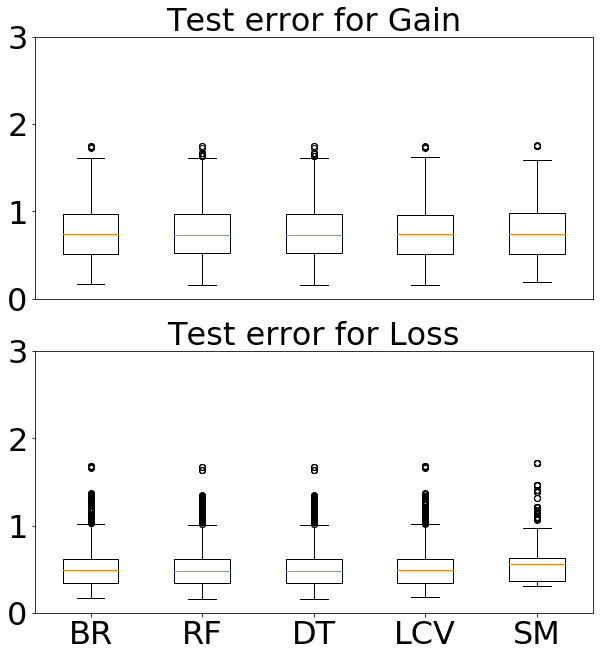

In [11]:
import numpy as np
print(sortedDict.keys())

gain = 0
print("### Gain ###")

for gainError in errorArray[0]:
    gain += np.mean(gainError)
    print("Mean: {}. Median: {}. Max: {}".format(np.mean(gainError), np.median(gainError), np.max(gainError)))

loss = 0
print("### Loss ###")

for lossError in errorArray[1]:
    loss += np.mean(lossError)
    print("Mean: {}. Median: {}. Max: {}".format(np.mean(lossError), np.median(lossError), np.max(lossError)))
    
print("Mean Total - Gain: {}. Loss: {}".format(gain / 5, loss / 5))
plotGrid(errorArray[0], errorArray[1])